# TP &mdash; Restricted Boltzmann Machines

**Auteurs:**

* Javier Andres Boada Martinez
* Kevin Alexandro Sanchez Diaz
* Yevhenii Sielskyi

## Échantillonnage des données

In [43]:
import scipy.io
import numpy as np
from matplotlib import pyplot as plt

mat = scipy.io.loadmat('binaryalphadigs.mat')

In [44]:
# 26 handwritten letters (A-Z) and 10 digits,
# 39 examples of each class: 
mat['dat'].shape

(36, 39)

In [45]:
mat['dat'][0, 0].shape

(20, 16)

In [46]:
mat['dat'][[0, 1, 2]].shape

(3, 39)

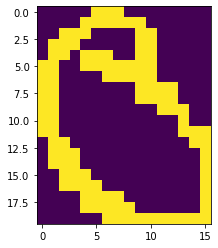

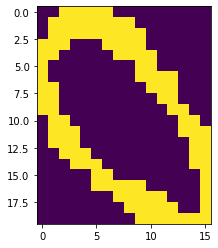

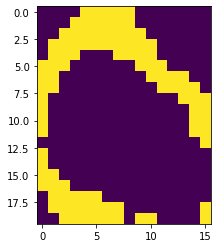

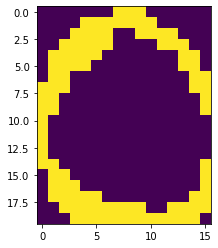

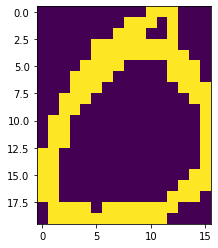

In [47]:
for image in mat['dat'][0, :5]:
    plt.imshow(image)
    plt.show()

In [48]:
def read_alpha_digits(data, indices):
    dataset = []
    
    for idx in indices:
        dataset += [image.reshape(-1) for image in data[idx]]

    return np.array(dataset)

In [49]:
dataset = read_alpha_digits(mat['dat'], [10, 11])

In [50]:
dataset.shape

(78, 320)

## Entraînement

In [51]:
from rbm import RBM

In [52]:
rbm = RBM(dataset.shape[-1], 200)

In [57]:
rbm.train(dataset, lr=.01, epochs=500, batch_size=10)

In [67]:
test_images = rbm.generate_images(iter_gibbs=100, nb_images=5)

In [68]:
test_images.shape

(5, 20, 16)

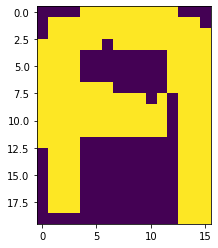

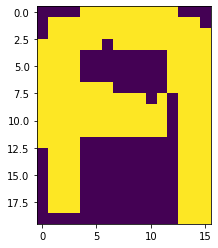

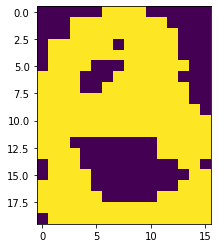

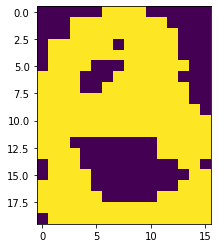

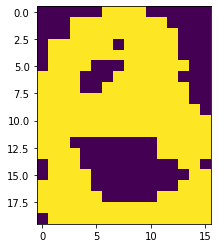

In [69]:
for test_image in test_images:
    plt.imshow(test_image)
    plt.show()